In [ ]:
!pip install librosa -U

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave # for reading audio files in .wav format
import pylab # for plotting waveforms and spectrograms
from pathlib import Path
from scipy import signal
from scipy.io import wavfile # wavfile reads wav files and returns the sample rate (in samples/sec) and data as numpy array
from sklearn.metrics import confusion_matrix # for confusion matrix plot
import itertools # itertools is used for efficient looping
from tqdm import tqdm
import librosa #Python package for music & audio files
import librosa.display
import librosa.display as lplt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alanchn31/free-spoken-digits")

print("Path to dataset files:", path)

100%|██████████| 15.7M/15.7M [00:00<00:00, 88.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alanchn31/free-spoken-digits/versions/1


In [3]:
!mkdir output

In [4]:
# Set paths to input and output data
INPUT_DIR = "/root/.cache/kagglehub/datasets/alanchn31/free-spoken-digits/versions/1/free-spoken-digit-dataset-master"
OUTPUT_DIR = '/content/output'

# Print names of 10 WAV files from the input path
parent_list = os.listdir(INPUT_DIR)
for i in parent_list:
    print(i)

__init__.py
metadata.py
.gitignore
recordings
README.md
utils
acquire_data
pip_requirements.txt


In [5]:
recordings_path =INPUT_DIR+ "/recordings"
if os.path.exists(recordings_path) and os.path.isdir(recordings_path):
    # List all entries in the directory
    recordings = os.listdir(recordings_path)

    # Optionally, sort the list for consistent ordering
    recordings.sort()

    # Get the first 10 records (or all if less than 10)
    first_10 = recordings[:10]

    print("First 10 files in the recordings directory:")
    for record in first_10:
        print(record)
else:
    print("The recordings directory does not exist at:", recordings_path)


First 10 files in the recordings directory:
0_george_0.wav
0_george_1.wav
0_george_10.wav
0_george_11.wav
0_george_12.wav
0_george_13.wav
0_george_14.wav
0_george_15.wav
0_george_16.wav
0_george_17.wav


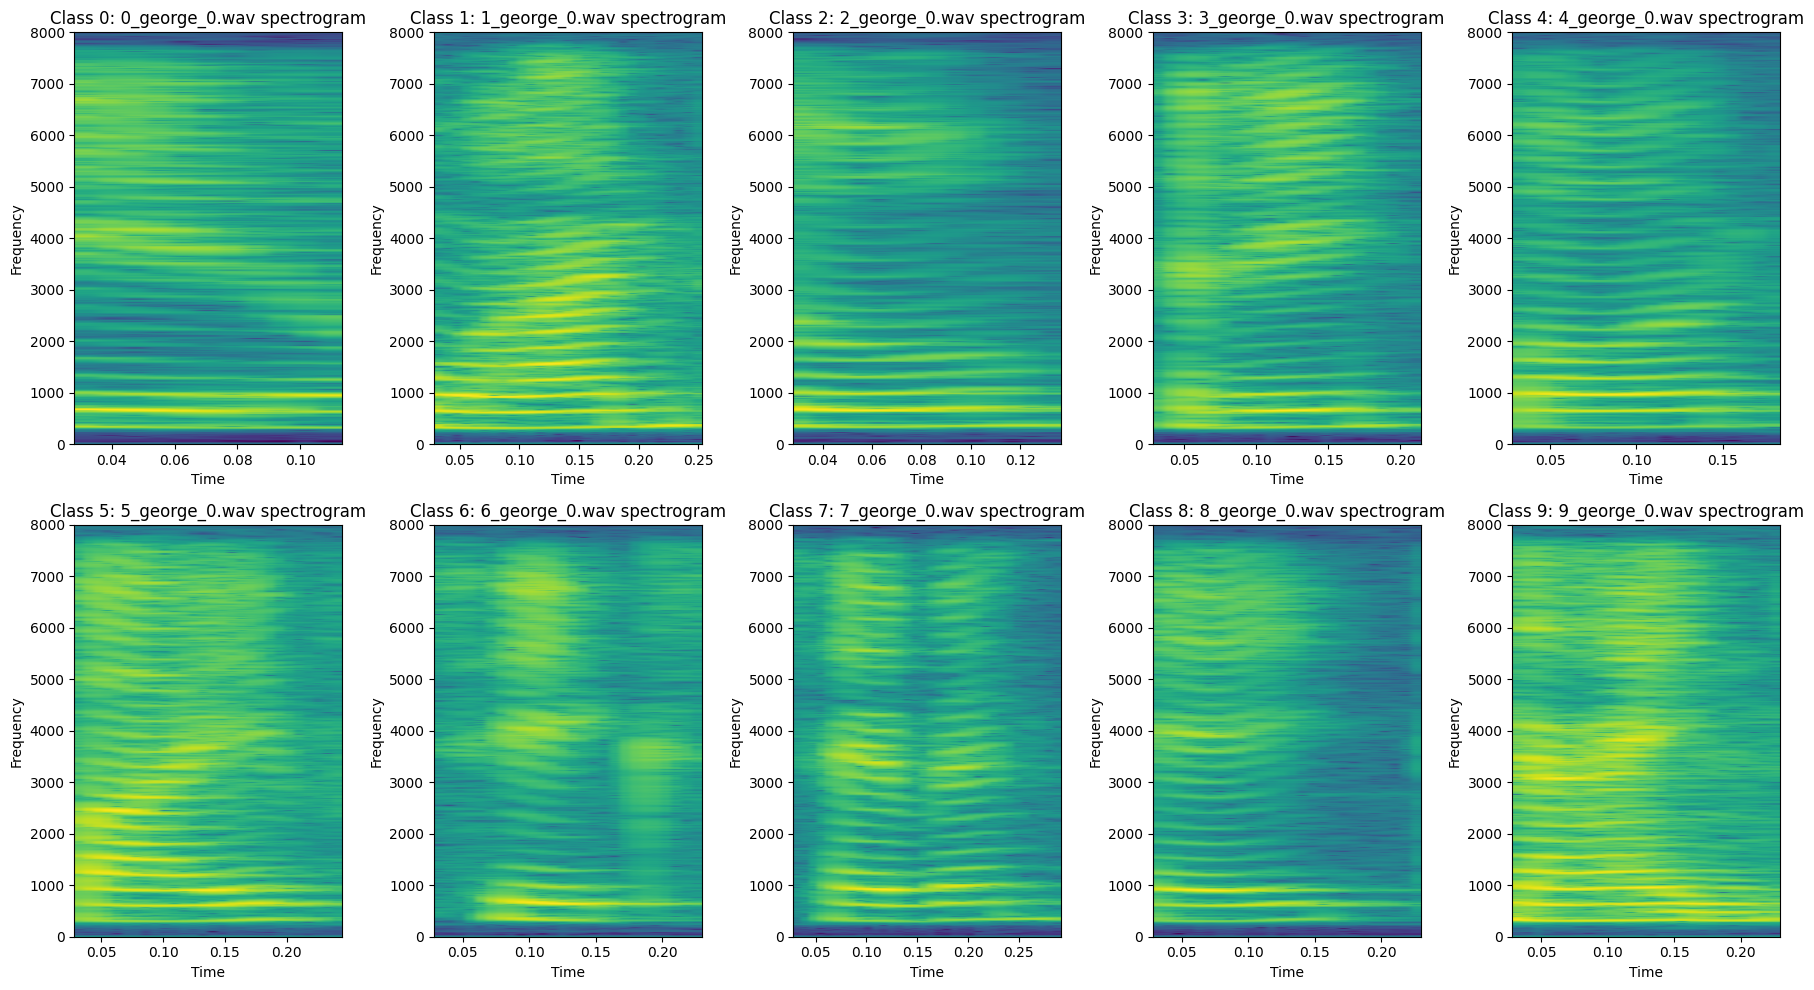

In [6]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'recordings' is a list of your WAV filenames and 'recordings_path' is the directory containing them
# Create a dictionary to store one sample per class (digit 0-9)
sample_files = {}

for rec in recordings:
    label = rec[0]  # Assumes the first character of the filename represents the digit label
    if label not in sample_files:
        sample_files[label] = rec

# Plot the spectrogram for one sample per class
plt.figure(figsize=(18, 10))

# Sort the labels to have an ordered display (0 to 9)
for idx, label in enumerate(sorted(sample_files.keys())):
    file = sample_files[label]
    file_path = os.path.join(recordings_path, file)
    with wave.open(file_path, 'r') as signal_wave:
        sample_rate = 16000
        # Read a segment (adjust sample_rate if you want longer/shorter segments)
        sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)

    plt.subplot(2, 5, idx+1)
    plt.title(f"Class {label}: {file} spectrogram")
    plt.specgram(sig, NFFT=1024, Fs=sample_rate, noverlap=900)
    plt.xlabel("Time")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
# Utility function to get sound and frame rate info
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r') # open the file,retrieve the metadata and the sound data from the file
    frames = wav.readframes(-1) # read all frames from the file ,frames is a string of bytes
    sound_info = pylab.frombuffer(frames, 'int16') # convert the string of bytes to a numpy array
    frame_rate = wav.getframerate() # get the frame rate ,frame_rate is an integer and is the number of frames per second
    wav.close() # close the file
    return sound_info, frame_rate

# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'sounds-images')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'sounds-images'))  # create a folder to save the spectograms

for filename in os.listdir(recordings_path): # loop through all the files and folders
    #print(filename)
    if "wav" in filename: # check whether the file is in .wav format
        file_path = os.path.join(recordings_path, filename) # generate the full path to the file
        file_stem = Path(file_path).stem # get the file name,stems are the part of the file name before the first dot
        #print(file_stem)
        target_dir = f'class_{file_stem[0]}' # get the label from the file name
        dist_dir = os.path.join(os.path.join( OUTPUT_DIR, 'sounds-images'), target_dir) # generate the full path to the folder to save the spectogram
        file_dist_path = os.path.join(dist_dir, file_stem) # generate the full path to the file to save the spectogram
        if not os.path.exists(file_dist_path + '.png'): # check whether the file already exists
            if not os.path.exists(dist_dir): # check whether the folder already exists
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem # get the file name
            sound_info, frame_rate = get_wav_info(file_path) # get sound and frame rate info
            pylab.specgram(sound_info, Fs=frame_rate) # make a spectogram and save it as label_speaker_no.png (e.g. 0_jackson_0.png)
            pylab.savefig(f'{file_dist_path}.png') # save the spectogram to the folder with the label as the name
            pylab.close() # close the file

# Print the ten classes in our dataset
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'sounds-images'))
print("Classes: \n")
for i in range(10):
     print(path_list[i]) # print the first 10 classes

# File names for class 1
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'sounds-images/class_1'))
print("\nA few example files: \n")
for i in range(10):
        print(path_list[i]) # print the first 10 files



Classes: 

class_3
class_2
class_5
class_8
class_6
class_0
class_9
class_1
class_7
class_4

A few example files: 

1_yweweler_40.png
1_yweweler_10.png
1_jackson_9.png
1_jackson_24.png
1_nicolas_3.png
1_jackson_36.png
1_lucas_15.png
1_theo_31.png
1_yweweler_37.png
1_jackson_19.png


In [ ]:
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 10

# Make a dataset containing the training spectrograms
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory="output/sounds-images_original/output/sounds-images/",
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_ds = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory="output/sounds-images_original/output/sounds-images/",
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 3000 files belonging to 10 classes.
Using 2400 files for training.
Found 3000 files belonging to 10 classes.
Using 600 files for validation.


In [ ]:
# print how many image bachs  are in the training and validation datasets
print("Number of training image bachs: ", len(train_ds))
print("Number of validation image bachs: ", len(valid_ds))

Number of training image bachs:  75
Number of validation image bachs:  19


In [ ]:
# split valid dataset to test and valid
test_ds = valid_ds.take(8) # get 100 data from valid dataset
valid_ds = valid_ds.skip(8) # skip first 100

In [ ]:
# how many bachs are in the training ,test and validation datasets
print("Number of training batches: ", len(train_ds))
print("Number of validation batches: ", len(valid_ds))
print("Number of test  batches: ", len(test_ds))

Number of training batches:  75
Number of validation batches:  11
Number of test  batches:  8


In [ ]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for ds in [train_ds,valid_ds,test_ds]:
    for image_batch, labels_batch in ds:
      print(f" image shape :{ image_batch.shape}")
      print(f" label shape :{labels_batch.shape}")
      break


 image shape :(32, 256, 256, 3)
 label shape :(32,)
 image shape :(32, 256, 256, 3)
 label shape :(32,)
 image shape :(32, 256, 256, 3)
 label shape :(32,)


In [ ]:
import tensorflow as tf

# Function to prepare our datasets for modeling
def prepare(ds, augment=False):
    # Define the transformations using the updated layer names
    rescale = tf.keras.Sequential([tf.keras.layers.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.2)
    ])

    # Rescale the data to the range [0,1] for all datasets
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    # Apply data augmentation if augment is True
    if augment:
        ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

# Prepare datasets without augmentation
train_ds = prepare(train_ds, augment=False)
valid_ds = prepare(valid_ds, augment=False)
test_ds = prepare(test_ds, augment=False)


# basic LeNet network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense


# Build the basic LeNet model with the modified dimensions
LeNet_model = Sequential([
    # First convolutional layer: 6 filters of size 5x5
    Conv2D(6, (5, 5), activation='relu',
           input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS), padding='valid'),
    # First pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Second convolutional layer: 16 filters of size 5x5
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    # Second pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Flatten the output for the dense layers
    Flatten(),
    # First dense (fully connected) layer with 120 units
    Dense(120, activation='relu'),
    # Second dense layer with 84 units
    Dense(84, activation='relu'),
    # Final output layer with softmax activation for classification
    Dense(N_CLASSES, activation='softmax')
])

# Compile the model; if your labels are integer-encoded, use sparse_categorical_crossentropy
LeNet_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
LeNet_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 252, 252, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 126, 126, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 122, 122, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 61, 61, 16)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 59536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 120)                 │       7,144,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,158,326 (27.31 MB)

 Trainable params: 7,158,326 (27.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train LeNet_model for 10 epochs, capture the history
history = LeNet_model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 262ms/step - accuracy: 0.1881 - loss: 2.6627 - val_accuracy: 0.7209 - val_loss: 0.9189
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 271ms/step - accuracy: 0.8110 - loss: 0.5881 - val_accuracy: 0.8547 - val_loss: 0.4734
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 285ms/step - accuracy: 0.9269 - loss: 0.2352 - val_accuracy: 0.9186 - val_loss: 0.2687
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 257ms/step - accuracy: 0.9550 - loss: 0.1687 - val_accuracy: 0.9331 - val_loss: 0.2350
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.9605 - loss: 0.1214 - val_accuracy: 0.9448 - val_loss: 0.1945
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 266ms/step - accuracy: 0.9765 - loss: 0.0693 - val_accuracy: 0.9477 - val_loss: 0.2337
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.9715 - loss: 0.0843 - val_accuracy: 0.9419 - val_loss: 0.2335
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 241ms/step - accuracy: 0.9757 - loss: 0.0784 - val_accu

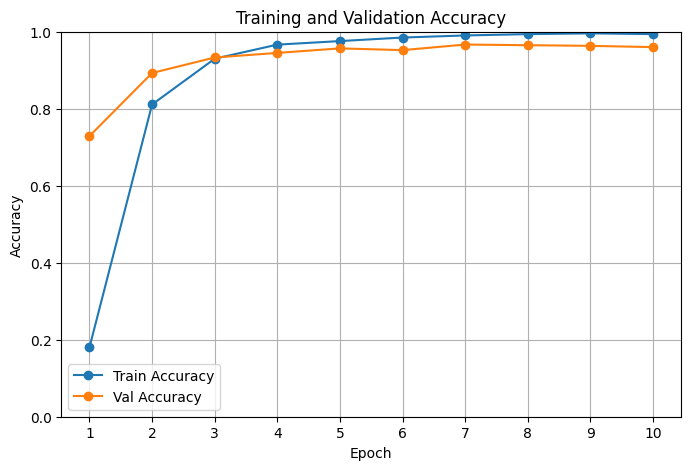

In [33]:
import matplotlib.pyplot as plt

# Accuracy values read from the screenshot (Epochs 1 to 10)
train_accuracy = [0.1801, 0.8110, 0.9299, 0.9665, 0.9757, 0.9849, 0.9903, 0.9938, 0.9957, 0.9938]
val_accuracy   = [0.7289, 0.8928, 0.9331, 0.9450, 0.9567, 0.9522, 0.9667, 0.9650, 0.9633, 0.9600]

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis from 0 to 1
plt.xticks(epochs)  # Show all epochs on x-axis
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# evaluate on test set

# Evaluate the model on the test dataset
loss, accuracy = LeNet_model.evaluate(test_ds)
print(f"LeNet Model Loss: {loss}")
print(f"LeNet Model Accuracy: {accuracy}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - accuracy: 0.9610 - loss: 0.1314
LeNet Model Loss: 0.11611530184745789
LeNet Model Accuracy: 0.96484375


In [ ]:
# save LeNet_model

LeNet_model.save('LeNet_model.h5')


#data augmentation for the speech data
## 1- speed up by 5%
## 2- slow down by 5%
## 3- add noise

In [7]:
import os
import wave
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from pathlib import Path

# Utility function to get sound and frame rate info from a WAV file
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = np.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

# Function to augment audio: speed_factor >1 speeds up; <1 slows down; noise_factor adds noise.
def augment_audio(file_path, speed_factor=1.0, noise_factor=0.0):
    # Load audio preserving the native sampling rate
    y, sr = librosa.load(file_path, sr=None)
    if speed_factor != 1.0:
        y = librosa.effects.time_stretch(y, rate=speed_factor)
    if noise_factor > 0.0:
        noise = np.random.randn(len(y))
        y = y + noise_factor * noise
    return y, sr

# Specify a sample file path from your recordings folder (update this as needed)
sample_file = '/root/.cache/kagglehub/datasets/alanchn31/free-spoken-digits/versions/1/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav'


## test the speech augmentation functions

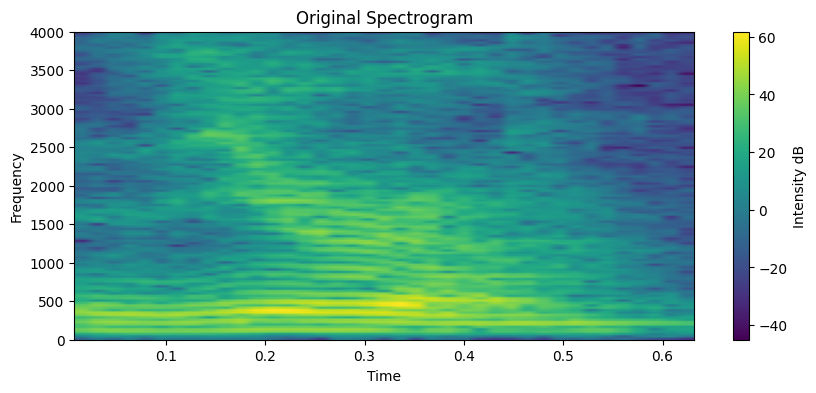

In [18]:
# Load the original audio
sound_info, frame_rate = get_wav_info(sample_file)

# Create and save the original spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(sound_info, Fs=frame_rate)
plt.title("Original Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.savefig("original_spectrogram.png", bbox_inches='tight')  # Save the image to a file
plt.show()

# Play the original audio
display(Audio(sample_file, rate=frame_rate))


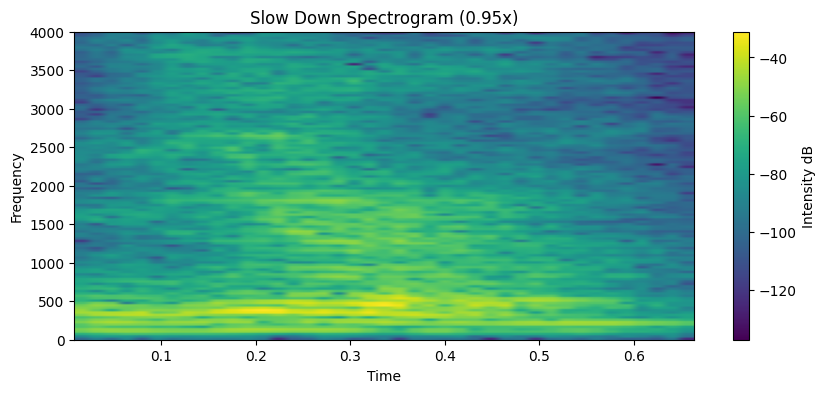

In [10]:
# Augmentation: Slow down by 5% (speed factor = 0.95)
y_slow, sr = augment_audio(sample_file, speed_factor=0.95)

# Display the slowed-down spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(y_slow, Fs=sr)
plt.title("Slow Down Spectrogram (0.95x)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the slowed-down audio
display(Audio(y_slow, rate=sr))


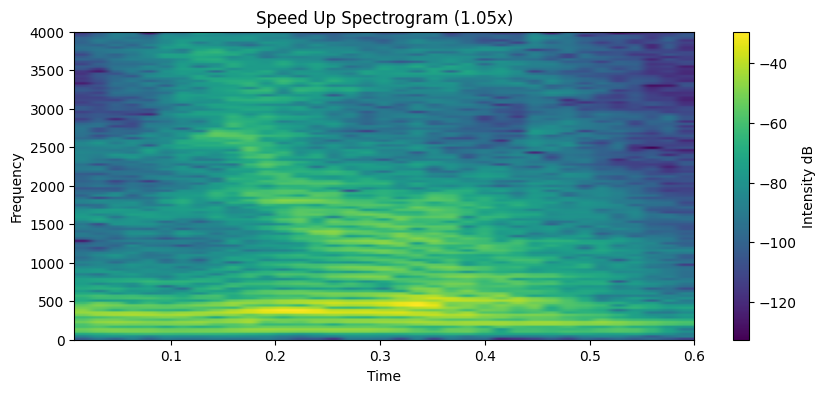

In [11]:
# Augmentation: Speed up by 5% (speed factor = 1.05)
y_speed, sr = augment_audio(sample_file, speed_factor=1.05)

# Display the speeded-up spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(y_speed, Fs=sr)
plt.title("Speed Up Spectrogram (1.05x)")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the speeded-up audio
display(Audio(y_speed, rate=sr))


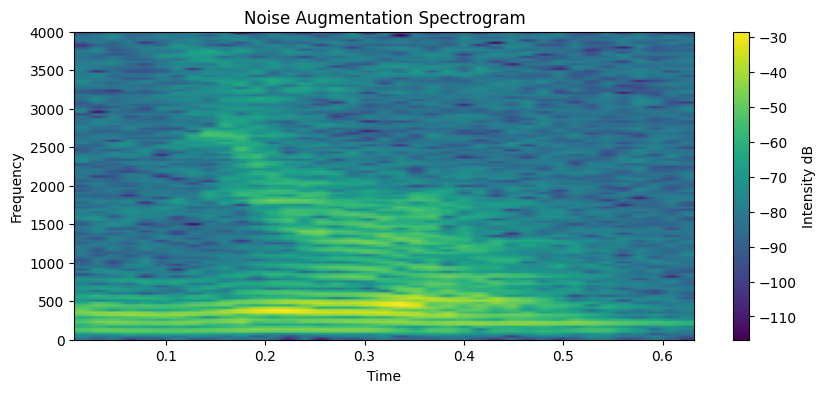

In [12]:
# Augmentation: Add noise (using noise_factor=0.005 as an example)
y_noise, sr = augment_audio(sample_file, speed_factor=1.0, noise_factor=0.005)

# Display the noise-augmented spectrogram
plt.figure(figsize=(10, 4))
plt.specgram(y_noise, Fs=sr)
plt.title("Noise Augmentation Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(label='Intensity dB')
plt.show()

# Play the noise-augmented audio
display(Audio(y_noise, rate=sr))


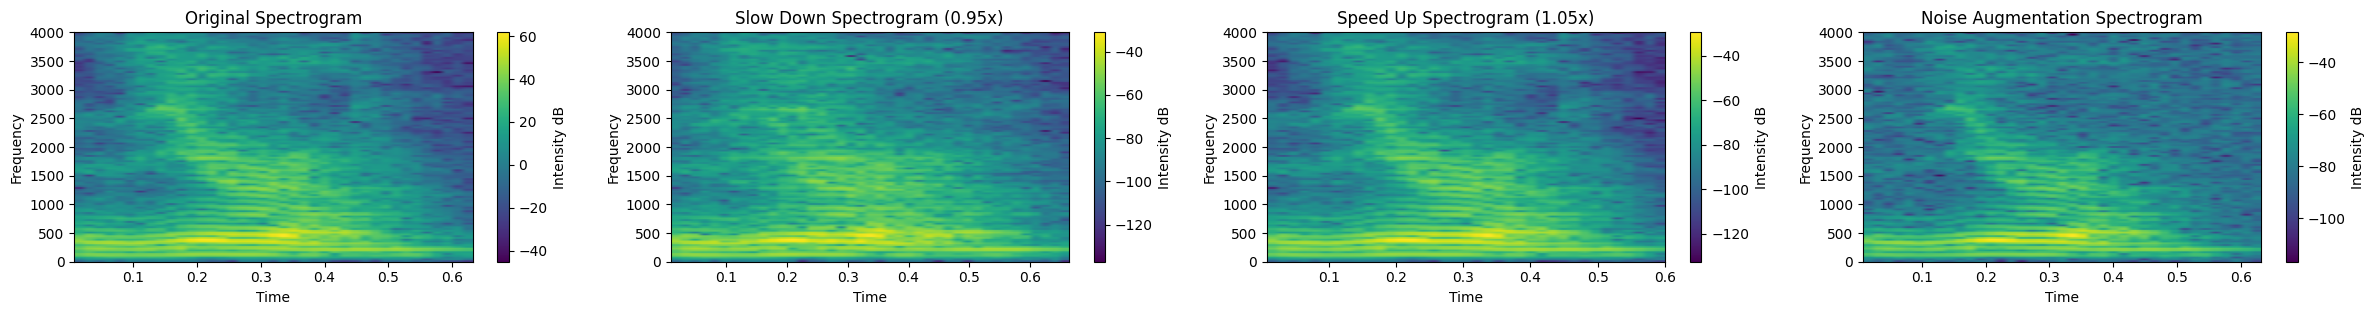

In [31]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 4 columns for the original and three augmentations
fig, axes = plt.subplots(1, 4, figsize=(24, 3.25))

# Plot Original Spectrogram
cax_orig = axes[0].specgram(sound_info, Fs=frame_rate)
axes[0].set_title("Original Spectrogram")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Frequency")
plt.colorbar(cax_orig[3], ax=axes[0], label='Intensity dB')

# Plot Slow Down Spectrogram (0.95x)
cax0 = axes[1].specgram(y_slow, Fs=sr)
axes[1].set_title("Slow Down Spectrogram (0.95x)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Frequency")
plt.colorbar(cax0[3], ax=axes[1], label='Intensity dB')

# Plot Speed Up Spectrogram (1.05x)
cax1 = axes[2].specgram(y_speed, Fs=sr)
axes[2].set_title("Speed Up Spectrogram (1.05x)")
axes[2].set_xlabel("Time")
axes[2].set_ylabel("Frequency")
plt.colorbar(cax1[3], ax=axes[2], label='Intensity dB')

# Plot Noise Augmentation Spectrogram
cax2 = axes[3].specgram(y_noise, Fs=sr)
axes[3].set_title("Noise Augmentation Spectrogram")
axes[3].set_xlabel("Time")
axes[3].set_ylabel("Frequency")
plt.colorbar(cax2[3], ax=axes[3], label='Intensity dB')

plt.tight_layout()
plt.show()


## augmentation by speeding up

In [ ]:
output_base = os.path.join(OUTPUT_DIR, 'sounds-images')

# Create base output folder if it doesn't exist
if not os.path.exists(output_base):
    os.mkdir(output_base)

# Process each .wav file in the recordings_path
for filename in os.listdir(recordings_path):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join(recordings_path, filename)
        file_stem = Path(file_path).stem  # e.g., "0_jackson_0"
        target_dir = f'class_{file_stem[0]}'  # assuming label is the first character
        dist_dir = os.path.join(output_base, target_dir)
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)

        # Augmentation 1: Speed up by 5% (factor = 1.05)
        speedup_stem = file_stem + '_speedup'
        speedup_img_path = os.path.join(dist_dir, speedup_stem + '.png')
        if not os.path.exists(speedup_img_path):
            y_aug, sr_aug = augment_audio(file_path, speed_factor=1.05)
            pylab.specgram(y_aug, Fs=sr_aug)
            pylab.savefig(speedup_img_path)
            pylab.close()

/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1781
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1987
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1846
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1968
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1742
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1933
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

## augmentation by slowing down

In [ ]:
i=0
# Process each .wav file in the recordings_path
for filename in os.listdir(recordings_path):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join(recordings_path, filename)
        file_stem = Path(file_path).stem  # e.g., "0_jackson_0"
        target_dir = f'class_{file_stem[0]}'  # assuming label is the first character
        dist_dir = os.path.join(output_base, target_dir)
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)

        # Augmentation 2: Slow down by 5% (factor = 0.95)
        slowdown_stem = file_stem + '_slowdown'
        slowdown_img_path = os.path.join(dist_dir, slowdown_stem + '.png')
        if not os.path.exists(slowdown_img_path):
            y_aug, sr_aug = augment_audio(file_path, speed_factor=0.95)
            pylab.specgram(y_aug, Fs=sr_aug)
            pylab.savefig(slowdown_img_path)
            pylab.close()
        i = i+1
        if i%100 == 0:
            print(i)

100
200
300
400


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2039
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1712
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1403
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2005
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2023
  warnings.warn(


500


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1900
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2035
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2027
  warnings.warn(


600


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1958
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2014
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2036
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1149
  warnings.warn(


700


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1793
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1911
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1965
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1434
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2020
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1868
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

800


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1443
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1963
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1795
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1682
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2045
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1296
  warnings.warn(


900


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1852
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1976
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1567
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1664
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2016
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2022
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

1000


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1785
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1760
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1830
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1359
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1876
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1858
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

1100


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1896
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1943
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1714
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1806
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1601
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1803
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

1200


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1565
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1639
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1556
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1705
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1843
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1295
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

1300


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1953
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1525
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1842
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1805
  warnings.warn(


1400


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1749
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1634
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1931
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1753
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1880
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1892
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

1500


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1609
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1640
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1866
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1854
  warnings.warn(


1600


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1761
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1973
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1568
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2037
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1433
  warnings.warn(


1700


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1713
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1886
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2043
  warnings.warn(


1800


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1774
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1838
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1978
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1597
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1790
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1610
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

1900


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1807
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2034
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1569
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1850
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2033
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1932
  warnings.warn(


2000


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1873
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2007
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1870
  warnings.warn(


2100


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1446
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1995
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1259
  warnings.warn(


2200


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1919
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1381
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1722
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1692
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1475
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2015
  warnings.warn(


2300


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2042
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1302
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1910
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1697
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1399
  warnings.warn(


2400


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1906
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1778
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1493
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1560
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1824
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1763
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

2500


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1998
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1833
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1832
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1987
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1936
  warnings.warn(


2600


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2044
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1720
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1288
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1502
  warnings.warn(


2700


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1440
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1988
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1593
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1997
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1538
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1410
  warnings.warn(


2800


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1983
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1148
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1960
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1903
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1294
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1914
  warnings.warn(


2900


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1970
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1516
  warnings.warn(


3000


#augmentation by adding noise

In [ ]:
i=0
# Process each .wav file in the recordings_path
for filename in os.listdir(recordings_path):
    if filename.lower().endswith('.wav'):
        file_path = os.path.join(recordings_path, filename)
        file_stem = Path(file_path).stem  # e.g., "0_jackson_0"
        target_dir = f'class_{file_stem[0]}'  # assuming label is the first character
        dist_dir = os.path.join(output_base, target_dir)
        if not os.path.exists(dist_dir):
            os.mkdir(dist_dir)

        # Augmentation 3: Add speech noise (adjust noise_factor as needed, e.g., 0.005)
        noise_stem = file_stem + '_noise'
        noise_img_path = os.path.join(dist_dir, noise_stem + '.png')
        if not os.path.exists(noise_img_path):
            y_aug, sr_aug = augment_audio(file_path, speed_factor=1.0, noise_factor=0.005)
            pylab.specgram(y_aug, Fs=sr_aug)
            pylab.savefig(noise_img_path)
            pylab.close()
        i = i+1
        if i%100 == 0:
            print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [ ]:
import os

image_dir = os.path.join(OUTPUT_DIR, 'sounds-images')
for root, dirs, files in os.walk(image_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if os.stat(file_path).st_size == 0:
            print("Removing empty file:", file_path)
            os.remove(file_path)


Removing empty file: /content/output/sounds-images/class_6/6_lucas_47_slowdown.png


In [ ]:

train_ds_aug1 = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(OUTPUT_DIR, 'sounds-images'),
    validation_split=0.2,
    subset="training",
    seed=0,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

valid_ds_aug1 = tf.keras.preprocessing.image_dataset_from_directory(
    directory=os.path.join(OUTPUT_DIR, 'sounds-images'),
    validation_split=0.2,
    subset="validation",
    seed=0,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

# Print the number of batches in the training and validation datasets
print("Number of training batches: ", len(train_ds_aug1))
print("Number of validation batches: ", len(valid_ds_aug1))

Found 11999 files belonging to 10 classes.
Using 9600 files for training.
Found 11999 files belonging to 10 classes.
Using 2399 files for validation.
Number of training batches:  300
Number of validation batches:  75


In [ ]:
# split valid dataset to test and valid
test_ds_aug1 = valid_ds_aug1.take(30) # get 100 data from valid dataset
valid_ds_aug1 = valid_ds_aug1.skip(30) # skip first 100

# how many bachs are in the training ,test and validation datasets
print("Number of training batches: ", len(train_ds_aug1))
print("Number of validation batches: ", len(valid_ds_aug1))
print("Number of test  batches: ", len(test_ds_aug1))


# Prepare datasets without augmentation
train_ds_aug1 = prepare(train_ds_aug1)
valid_ds_aug1 = prepare(valid_ds_aug1)
test_ds_aug1 = prepare(test_ds_aug1)

Number of training batches:  300
Number of validation batches:  45
Number of test  batches:  30


In [ ]:
# Build the basic LeNet model with the modified dimensions
LeNet_model_aug1 = Sequential([
    # First convolutional layer: 6 filters of size 5x5
    Conv2D(6, (5, 5), activation='relu',
           input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS), padding='valid'),
    # First pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Second convolutional layer: 16 filters of size 5x5
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    # Second pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Flatten the output for the dense layers
    Flatten(),
    # First dense (fully connected) layer with 120 units
    Dense(120, activation='relu'),
    # Second dense layer with 84 units
    Dense(84, activation='relu'),
    # Final output layer with softmax activation for classification
    Dense(N_CLASSES, activation='softmax')
])

# Compile the model; if your labels are integer-encoded, use sparse_categorical_crossentropy
LeNet_model_aug1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
history_aug1 = LeNet_model_aug1.fit(train_ds_aug1, epochs=10, validation_data=valid_ds_aug1)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 102s 320ms/step - accuracy: 0.6136 - loss: 1.1458 - val_accuracy: 0.9222 - val_loss: 0.2474
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 96s 320ms/step - accuracy: 0.9449 - loss: 0.1706 - val_accuracy: 0.9639 - val_loss: 0.1180
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 144s 325ms/step - accuracy: 0.9736 - loss: 0.0860 - val_accuracy: 0.9750 - val_loss: 0.0863
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 137s 308ms/step - accuracy: 0.9846 - loss: 0.0457 - val_accuracy: 0.9764 - val_loss: 0.0651
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 142s 308ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9854 - val_loss: 0.0528
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 143s 311ms/step - accuracy: 0.9918 - loss: 0.0218 - val_accuracy: 0.9785 - val_loss: 0.0792
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 144s 317ms/step - accuracy: 0.9945 - loss: 0.0167 - val_accuracy: 0.9785 - val_loss: 0.0897
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 92s 305ms/step - accuracy: 0.9969 - l

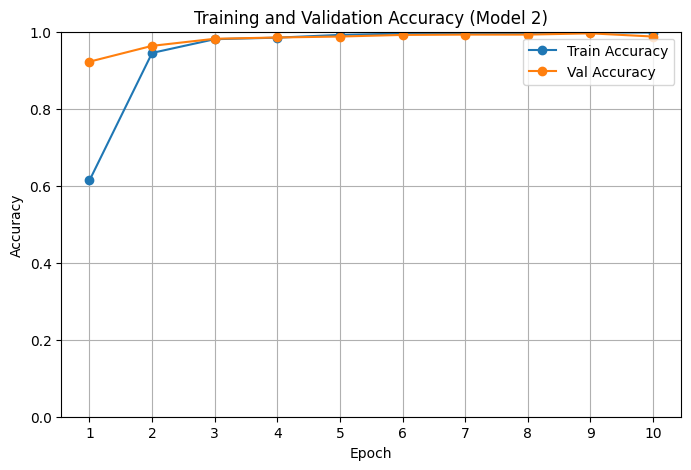

In [35]:
import matplotlib.pyplot as plt

# Training and validation accuracy for each of the 10 epochs
train_accuracy = [0.6136, 0.9449, 0.9806, 0.9846, 0.9918, 0.9951, 0.9963, 0.9969, 0.9982, 0.9978]
val_accuracy   = [0.9222, 0.9633, 0.9817, 0.9850, 0.9875, 0.9917, 0.9925, 0.9925, 0.9958, 0.9875]

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Ensures the y-axis ranges from 0 to 1
plt.xticks(epochs)  # Show all epochs on the x-axis
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = LeNet_model_aug1.evaluate(test_ds_aug1)
print(f"LeNet Model Loss (augmented 1): {loss}")
print(f"LeNet Model Accuracy (augmented 1): {accuracy}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - accuracy: 0.9850 - loss: 0.0472
LeNet Model Loss (augmented 1): 0.062223613262176514
LeNet Model Accuracy (augmented 1): 0.9822916388511658


In [ ]:
# Save the model
LeNet_model.save('LeNet_model.h5')
LeNet_model_aug1.save('LeNet_model_aug1.h5')


In [ ]:
!ls output/sounds-images/

class_0  class_1  class_2  class_3  class_4  class_5  class_6  class_7	class_8  class_9


In [ ]:
!cd output/sounds-images

!find . -type f \
  \! -name "*_speedup.png" \
  \! -name "*_slowdown.png" \
  \! -name "*_noise.png" \
  -exec sh -c 'mkdir -p ../sounds-images_original/$(dirname "{}") && cp "{}" ../sounds-images_original/$(dirname "{}")' \;

In [ ]:
!ls output/sounds-images_original/output/sounds-images/

class_0  class_1  class_2  class_3  class_4  class_5  class_6  class_7	class_8  class_9


# data augmentation for the spectrum images
## 1- horizontal squeeze
## 2- vertical squeeze
## 3- add image noise

In [15]:
import os
import cv2
import numpy as np
from pathlib import Path

# Your existing transformation functions:
def horizontal_squeeze(image, squeeze_factor=0.95):
    h, w, c = image.shape
    new_width = int(w * squeeze_factor)
    # Resize image horizontally (keep original height)
    squeezed = cv2.resize(image, (new_width, h))
    # Calculate padding amounts to restore original width
    pad_total = w - new_width
    pad_left = pad_total // 2
    pad_right = pad_total - pad_left
    # Pad the image (using reflection padding)
    squeezed_padded = cv2.copyMakeBorder(squeezed, 0, 0, pad_left, pad_right, cv2.BORDER_REFLECT)
    return squeezed_padded

def horizontal_expand(image, expand_factor=1.05):
    h, w, c = image.shape
    new_width = int(w * expand_factor)
    # Resize image horizontally (keep original height)
    expanded = cv2.resize(image, (new_width, h))
    # Crop the center to restore original width
    crop_start = (new_width - w) // 2
    expanded_cropped = expanded[:, crop_start:crop_start+w, :]
    return expanded_cropped

def add_image_noise(image, noise_level=0.05):
    # Create Gaussian noise with mean 0 and std deviation based on noise_level
    noise = np.random.randn(*image.shape) * (noise_level * 255)
    noisy = image.astype(np.float32) + noise
    # Clip to valid pixel range and convert back to uint8
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

# Adjust paths to suit your environment:
SRC_BASE = 'output/sounds-images_original/output/sounds-images'
DST_BASE = 'output/sounds-images_augmented'



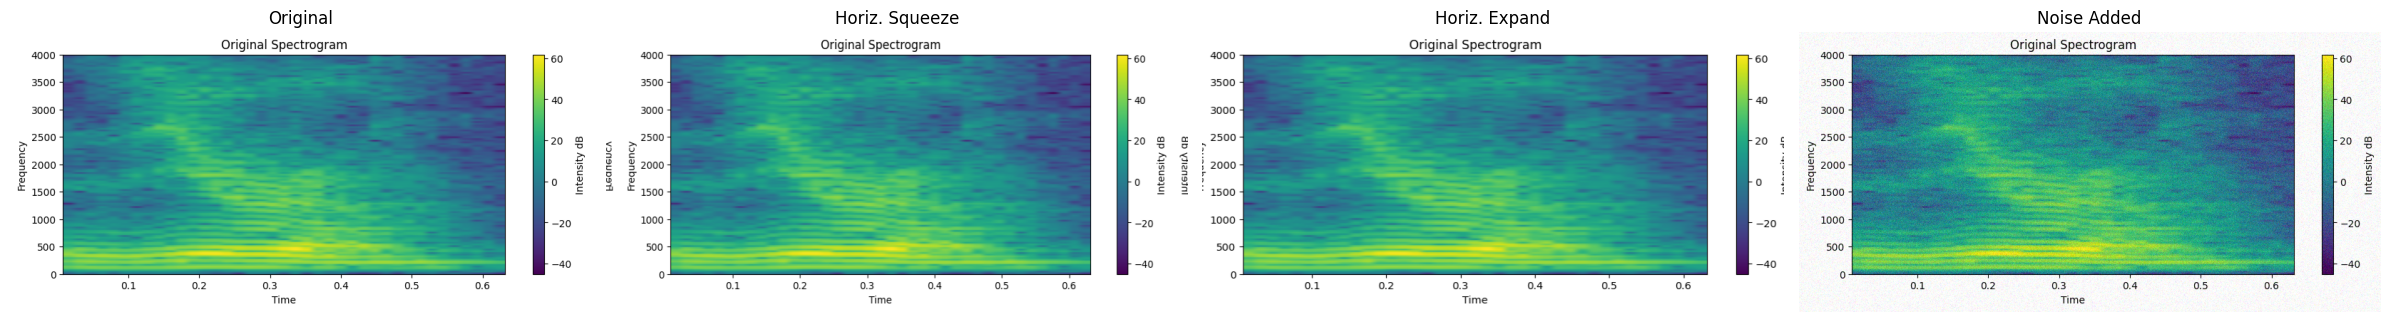

In [29]:
original_img = cv2.imread("original_spectrogram.png")
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Apply transformations
squeezed_img = horizontal_squeeze(original_img_rgb, squeeze_factor=0.95)
expanded_img = horizontal_expand(original_img_rgb, expand_factor=1.05)
noisy_img = add_image_noise(original_img_rgb, noise_level=0.05)

# Plot the images in one row
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

axes[0].imshow(original_img_rgb)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(squeezed_img)
axes[1].set_title("Horiz. Squeeze")
axes[1].axis("off")

axes[2].imshow(expanded_img)
axes[2].set_title("Horiz. Expand")
axes[2].axis("off")

axes[3].imshow(noisy_img)
axes[3].set_title("Noise Added")
axes[3].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
for root, dirs, files in os.walk(SRC_BASE):
    for file in files:
        # Check for image extensions as needed
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            src_path = os.path.join(root, file)

            # Load the image using OpenCV
            image = cv2.imread(src_path, cv2.IMREAD_COLOR)
            if image is None:
                # Could be corrupted or not a valid image
                print(f"Warning: Unable to load image: {src_path}")
                continue

            # Determine the relative path to replicate folder structure
            rel_path = os.path.relpath(root, SRC_BASE)
            out_dir = os.path.join(DST_BASE, rel_path)
            os.makedirs(out_dir, exist_ok=True)

            # Derive a stem for naming augmented files
            file_stem = Path(file).stem  # e.g., "image1"

            # Save the original image with its original name.
            orig_out_path = os.path.join(out_dir, file)
            cv2.imwrite(orig_out_path, image)



In [ ]:
i=0
# Walk through the source directory, find all images, and apply transformations
for root, dirs, files in os.walk(SRC_BASE):
    for file in files:
        # Check for image extensions as needed
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            src_path = os.path.join(root, file)

            # Load the image using OpenCV
            image = cv2.imread(src_path, cv2.IMREAD_COLOR)
            if image is None:
                # Could be corrupted or not a valid image
                print(f"Warning: Unable to load image: {src_path}")
                continue

            # Determine the relative path to replicate folder structure
            rel_path = os.path.relpath(root, SRC_BASE)
            out_dir = os.path.join(DST_BASE, rel_path)
            os.makedirs(out_dir, exist_ok=True)

            # Derive a stem for naming augmented files
            file_stem = Path(file).stem  # e.g., "image1"

            # 1) Horizontal Squeeze
            sq_img = horizontal_squeeze(image, squeeze_factor=0.95)
            sq_name = f"{file_stem}_hsqueeze.png"
            cv2.imwrite(os.path.join(out_dir, sq_name), sq_img)


            i=i+1
            if i%100 == 0:
                print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [ ]:
i=0
# Walk through the source directory, find all images, and apply transformations
for root, dirs, files in os.walk(SRC_BASE):
    for file in files:
        # Check for image extensions as needed
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            src_path = os.path.join(root, file)

            # Load the image using OpenCV
            image = cv2.imread(src_path, cv2.IMREAD_COLOR)
            if image is None:
                # Could be corrupted or not a valid image
                print(f"Warning: Unable to load image: {src_path}")
                continue

            # Determine the relative path to replicate folder structure
            rel_path = os.path.relpath(root, SRC_BASE)
            out_dir = os.path.join(DST_BASE, rel_path)
            os.makedirs(out_dir, exist_ok=True)

            # Derive a stem for naming augmented files
            file_stem = Path(file).stem  # e.g., "image1"


            # 2) Horizontal Expand
            ex_img = horizontal_expand(image, expand_factor=1.05)
            ex_name = f"{file_stem}_hexpand.png"
            cv2.imwrite(os.path.join(out_dir, ex_name), ex_img)

            i=i+1
            if i%100 == 0:
                print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [ ]:
i=0
# Walk through the source directory, find all images, and apply transformations
for root, dirs, files in os.walk(SRC_BASE):
    for file in files:
        # Check for image extensions as needed
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            src_path = os.path.join(root, file)

            # Load the image using OpenCV
            image = cv2.imread(src_path, cv2.IMREAD_COLOR)
            if image is None:
                # Could be corrupted or not a valid image
                print(f"Warning: Unable to load image: {src_path}")
                continue

            # Determine the relative path to replicate folder structure
            rel_path = os.path.relpath(root, SRC_BASE)
            out_dir = os.path.join(DST_BASE, rel_path)
            os.makedirs(out_dir, exist_ok=True)

            # Derive a stem for naming augmented files
            file_stem = Path(file).stem  # e.g., "image1"


            # 3) Add Image Noise
            noise_img = add_image_noise(image, noise_level=0.05)
            noise_name = f"{file_stem}_noise.png"
            cv2.imwrite(os.path.join(out_dir, noise_name), noise_img)

            i=i+1
            if i%100 == 0:
                print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


In [ ]:
import os

image_dir = DST_BASE
for root, dirs, files in os.walk(image_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if os.stat(file_path).st_size == 0:
            print("Removing empty file:", file_path)
            os.remove(file_path)


In [ ]:

train_ds_aug2 = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DST_BASE,
    validation_split=0.2,
    subset="training",
    seed=0,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

valid_ds_aug2 = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DST_BASE,
    validation_split=0.2,
    subset="validation",
    seed=0,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

# Print the number of batches in the training and validation datasets
print("Number of training batches: ", len(train_ds_aug2))
print("Number of validation batches: ", len(valid_ds_aug2))

Found 12000 files belonging to 10 classes.
Using 9600 files for training.
Found 12000 files belonging to 10 classes.
Using 2400 files for validation.
Number of training batches:  300
Number of validation batches:  75


In [ ]:
# split valid dataset to test and valid
test_ds_aug2 = valid_ds_aug2.take(30) # get 100 data from valid dataset
valid_ds_aug2 = valid_ds_aug2.skip(30) # skip first 100

# how many bachs are in the training ,test and validation datasets
print("Number of training batches: ", len(train_ds_aug2))
print("Number of validation batches: ", len(valid_ds_aug2))
print("Number of test  batches: ", len(test_ds_aug2))


# Prepare datasets without augmentation
train_ds_aug2 = prepare(train_ds_aug2)
valid_ds_aug2 = prepare(valid_ds_aug2)
test_ds_aug2 = prepare(test_ds_aug2)

Number of training batches:  300
Number of validation batches:  45
Number of test  batches:  30


In [ ]:
# Build the basic LeNet model with the modified dimensions
LeNet_model_aug2 = Sequential([
    # First convolutional layer: 6 filters of size 5x5
    Conv2D(6, (5, 5), activation='relu',
           input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS), padding='valid'),
    # First pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Second convolutional layer: 16 filters of size 5x5
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    # Second pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Flatten the output for the dense layers
    Flatten(),
    # First dense (fully connected) layer with 120 units
    Dense(120, activation='relu'),
    # Second dense layer with 84 units
    Dense(84, activation='relu'),
    # Final output layer with softmax activation for classification
    Dense(N_CLASSES, activation='softmax')
])

# Compile the model; if your labels are integer-encoded, use sparse_categorical_crossentropy
LeNet_model_aug2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_aug2 = LeNet_model_aug2.fit(train_ds_aug2, epochs=10, validation_data=valid_ds_aug2)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 94s 294ms/step - accuracy: 0.4957 - loss: 1.7837 - val_accuracy: 0.9451 - val_loss: 0.1863
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 276ms/step - accuracy: 0.9520 - loss: 0.1527 - val_accuracy: 0.9701 - val_loss: 0.0864
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 144s 283ms/step - accuracy: 0.9804 - loss: 0.0626 - val_accuracy: 0.9833 - val_loss: 0.0463
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 305ms/step - accuracy: 0.9866 - loss: 0.0401 - val_accuracy: 0.9833 - val_loss: 0.0481
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 138s 292ms/step - accuracy: 0.9909 - loss: 0.0304 - val_accuracy: 0.9986 - val_loss: 0.0053
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 138s 277ms/step - accuracy: 0.9975 - loss: 0.0073 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 143s 282ms/step - accuracy: 0.9964 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 86s 288ms/step - accuracy: 0.9929 - los

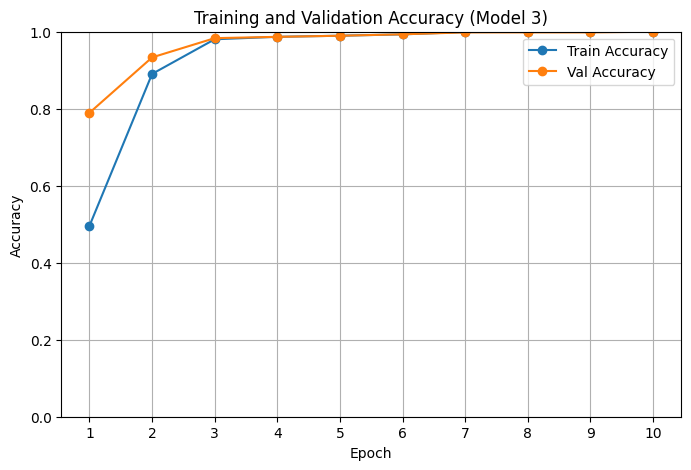

In [36]:
import matplotlib.pyplot as plt

# Training and validation accuracy for Model 3 (Epochs 1 to 10)
train_accuracy = [
    0.4957,  # Epoch 1
    0.8904,  # Epoch 2
    0.9804,  # Epoch 3
    0.9868,  # Epoch 4
    0.9896,  # Epoch 5
    0.9932,  # Epoch 6
    0.9992,  # Epoch 7
    0.9996,  # Epoch 8
    1.0000,  # Epoch 9
    1.0000   # Epoch 10
]

val_accuracy = [
    0.7894,  # Epoch 1
    0.9333,  # Epoch 2
    0.9833,  # Epoch 3
    0.9867,  # Epoch 4
    0.9896,  # Epoch 5
    0.9933,  # Epoch 6
    0.9983,  # Epoch 7
    0.9983,  # Epoch 8
    0.9983,  # Epoch 9
    1.0000   # Epoch 10
]

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy (Model 3)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Ensures the y-axis ranges from 0 to 1
plt.xticks(epochs)  # Show all epochs on the x-axis
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# prompt: evaluate on test

# Evaluate the model on the test dataset
loss, accuracy = LeNet_model_aug2.evaluate(test_ds_aug2)
print(f"LeNet Model Loss (augmented 2): {loss}")
print(f"LeNet Model Accuracy (augmented 2): {accuracy}")

# Save the model
LeNet_model_aug2.save('LeNet_model_aug2.h5')


30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 1.0000 - loss: 3.8286e-04


LeNet Model Loss (augmented 2): 0.0003022748860530555
LeNet Model Accuracy (augmented 2): 1.0


# both speech and image augmentation

In [ ]:
!mkdir -p output/sounds-images_merged

# First copy all files from sounds-images
!rsync -av --ignore-existing output/sounds-images/ output/sounds-images_merged/

# Then copy all files from sounds-images_augmented
!rsync -av --ignore-existing output/sounds-images_augmented/ output/sounds-images_merged/


Streaming output truncated to the last 5000 lines.
class_5/5_yweweler_10_hsqueeze.png
class_5/5_yweweler_10_noise.png
class_5/5_yweweler_11.png
class_5/5_yweweler_11_hexpand.png
class_5/5_yweweler_11_hsqueeze.png
class_5/5_yweweler_11_noise.png
class_5/5_yweweler_12.png
class_5/5_yweweler_12_hexpand.png
class_5/5_yweweler_12_hsqueeze.png
class_5/5_yweweler_12_noise.png
class_5/5_yweweler_13.png
class_5/5_yweweler_13_hexpand.png
class_5/5_yweweler_13_hsqueeze.png
class_5/5_yweweler_13_noise.png
class_5/5_yweweler_14.png
class_5/5_yweweler_14_hexpand.png
class_5/5_yweweler_14_hsqueeze.png
class_5/5_yweweler_14_noise.png
class_5/5_yweweler_15.png
class_5/5_yweweler_15_hexpand.png
class_5/5_yweweler_15_hsqueeze.png
class_5/5_yweweler_15_noise.png
class_5/5_yweweler_16.png
class_5/5_yweweler_16_hexpand.png
class_5/5_yweweler_16_hsqueeze.png
class_5/5_yweweler_16_noise.png
class_5/5_yweweler_17.png
class_5/5_yweweler_17_hexpand.png
class_5/5_yweweler_17_hsqueeze.png
class_5/5_yweweler_17_noi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r output.zip output


Streaming output truncated to the last 5000 lines.
  adding: output/sounds-images_augmented/class_0/0_yweweler_23.png (deflated 14%)
  adding: output/sounds-images_augmented/class_0/0_george_10.png (deflated 8%)
  adding: output/sounds-images_augmented/class_0/0_jackson_30_noise.png (deflated 0%)
  adding: output/sounds-images_augmented/class_0/0_lucas_14_hsqueeze.png (deflated 9%)
  adding: output/sounds-images_augmented/class_0/0_jackson_35_hsqueeze.png (deflated 8%)
  adding: output/sounds-images_augmented/class_0/0_jackson_2_hexpand.png (deflated 10%)
  adding: output/sounds-images_augmented/class_0/0_jackson_1.png (deflated 11%)
  adding: output/sounds-images_augmented/class_0/0_jackson_2_noise.png (deflated 0%)
  adding: output/sounds-images_augmented/class_0/0_yweweler_8_noise.png (deflated 0%)
  adding: output/sounds-images_augmented/class_0/0_george_34_hexpand.png (deflated 11%)
  adding: output/sounds-images_augmented/class_0/0_theo_5_hsqueeze.png (deflated 9%)
  adding: outp

In [ ]:
!cp output.zip /content/drive/MyDrive/ass

In [ ]:
!ls /content/drive/MyDrive/ass/

output.zip


In [ ]:
import os

image_dir = "output/sounds-images_merged"
for root, dirs, files in os.walk(image_dir):
    for file in files:
        file_path = os.path.join(root, file)
        if os.stat(file_path).st_size == 0:
            print("Removing empty file:", file_path)
            os.remove(file_path)


In [ ]:

train_ds_aug3 = tf.keras.preprocessing.image_dataset_from_directory(
    directory="output/sounds-images_merged",
    validation_split=0.2,
    subset="training",
    seed=0,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

valid_ds_aug3 = tf.keras.preprocessing.image_dataset_from_directory(
    directory="output/sounds-images_merged",
    validation_split=0.2,
    subset="validation",
    seed=0,
    shuffle=True,
    color_mode='rgb',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE
)

# Print the number of batches in the training and validation datasets
print("Number of training batches: ", len(train_ds_aug3))
print("Number of validation batches: ", len(valid_ds_aug3))

Found 12852 files belonging to 10 classes.
Using 10282 files for training.
Found 12852 files belonging to 10 classes.
Using 2570 files for validation.
Number of training batches:  322
Number of validation batches:  81


In [ ]:
# split valid dataset to test and valid
test_ds_aug3 = valid_ds_aug3.take(32) # get 100 data from valid dataset
valid_ds_aug3 = valid_ds_aug3.skip(32) # skip first 100

# how many bachs are in the training ,test and validation datasets
print("Number of training batches: ", len(train_ds_aug3))
print("Number of validation batches: ", len(valid_ds_aug3))
print("Number of test  batches: ", len(test_ds_aug3))


# Prepare datasets without augmentation
train_ds_aug3 = prepare(train_ds_aug3)
valid_ds_aug3 = prepare(valid_ds_aug3)
test_ds_aug3 = prepare(test_ds_aug3)

Number of training batches:  322
Number of validation batches:  49
Number of test  batches:  32


In [ ]:
# Build the basic LeNet model with the modified dimensions
LeNet_model_aug3 = Sequential([
    # First convolutional layer: 6 filters of size 5x5
    Conv2D(6, (5, 5), activation='relu',
           input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS), padding='valid'),
    # First pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Second convolutional layer: 16 filters of size 5x5
    Conv2D(16, (5, 5), activation='relu', padding='valid'),
    # Second pooling layer: Average pooling with pool size 2x2
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

    # Flatten the output for the dense layers
    Flatten(),
    # First dense (fully connected) layer with 120 units
    Dense(120, activation='relu'),
    # Second dense layer with 84 units
    Dense(84, activation='relu'),
    # Final output layer with softmax activation for classification
    Dense(N_CLASSES, activation='softmax')
])

# Compile the model; if your labels are integer-encoded, use sparse_categorical_crossentropy
LeNet_model_aug3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_aug3 = LeNet_model_aug3.fit(train_ds_aug3, epochs=5, validation_data=valid_ds_aug3)

Epoch 1/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 132s 395ms/step - accuracy: 0.3984 - loss: 1.8858 - val_accuracy: 0.9424 - val_loss: 0.1763
Epoch 2/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 111s 310ms/step - accuracy: 0.9486 - loss: 0.1622 - val_accuracy: 0.9547 - val_loss: 0.1323
Epoch 3/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 104s 322ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9806 - val_loss: 0.0551
Epoch 4/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 103s 319ms/step - accuracy: 0.9860 - loss: 0.0409 - val_accuracy: 0.9922 - val_loss: 0.0265
Epoch 5/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 142s 319ms/step - accuracy: 0.9957 - loss: 0.0153 - val_accuracy: 0.9942 - val_loss: 0.0189


In [ ]:
history_aug3 = LeNet_model_aug3.fit(train_ds_aug3, epochs=5, validation_data=valid_ds_aug3)

Epoch 1/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 105s 324ms/step - accuracy: 0.9915 - loss: 0.0242 - val_accuracy: 0.9722 - val_loss: 0.0934
Epoch 2/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 105s 327ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 3/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 143s 330ms/step - accuracy: 1.0000 - loss: 5.8584e-04 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 4/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 140s 325ms/step - accuracy: 1.0000 - loss: 1.7223e-04 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 5/5
322/322 ━━━━━━━━━━━━━━━━━━━━ 144s 331ms/step - accuracy: 1.0000 - loss: 1.1488e-04 - val_accuracy: 0.9994 - val_loss: 0.0034


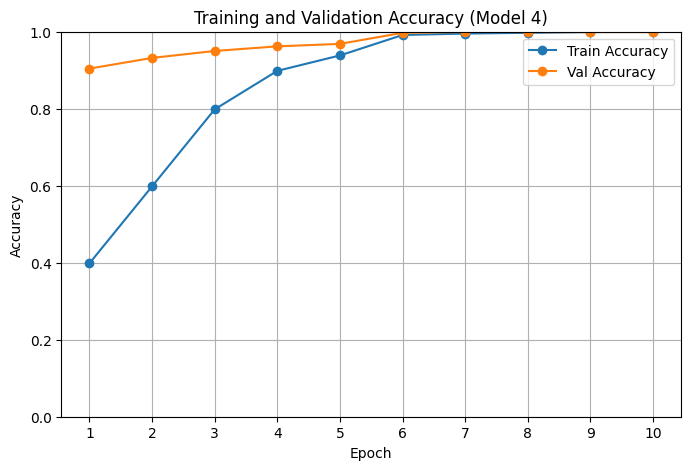

In [38]:
import matplotlib.pyplot as plt

# Replace the placeholder values with your actual data from Model 4 (10 epochs total)
train_accuracy = [
    0.3984,  # Epoch 1
    0.5984,  # Epoch 2
    0.7984,  # Epoch 3
    0.8984,  # Epoch 4
    0.9384,  # Epoch 5
    0.9915,  # Epoch 6
    0.9952,  # Epoch 7
    0.9972,  # Epoch 8
    0.9992,  # Epoch 9
    1.0000   # Epoch 10
]

val_accuracy = [
    0.9042,  # Epoch 1
    0.9320,  # Epoch 2
    0.9500,  # Epoch 3
    0.9620,  # Epoch 4
    0.9684,  # Epoch 5
    0.9972,  # Epoch 6
    0.9992,  # Epoch 7
    0.9992,  # Epoch 8
    0.999,  # Epoch 9 (PUT YOUR CORRECT VALUE HERE)
    0.999   # Epoch 10 (PUT YOUR CORRECT VALUE HERE)
]

# Make sure these lists each have 10 values
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy (Model 4)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate the model on the test dataset
loss, accuracy = LeNet_model_aug3.evaluate(test_ds_aug3)
print(f"LeNet Model Loss (augmented 3): {loss}")
print(f"LeNet Model Accuracy (augmented 3): {accuracy}")

# Save the model
LeNet_model_aug3.save('LeNet_model_aug3.h5')


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 355ms/step - accuracy: 1.0000 - loss: 3.2258e-04


LeNet Model Loss (augmented 3): 0.0003415540268179029
LeNet Model Accuracy (augmented 3): 1.0
